# Titanic - Machine Learning from Disaster

![titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg)

O naufrágio do RMS Titanic é um dos eventos mais marcantes da história marítima, tanto pela sua magnitude quanto pelas tragédias que desencadeou.

Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic, conhecido como "inafundável", colidiu com um iceberg e afundou. A falta de botes salva-vidas suficientes a bordo contribuiu para a morte de 1.502 das 2.224 pessoas entre passageiros e tripulantes.

Embora a sobrevivência tenha sido parcialmente influenciada pelo acaso, alguns fatores como classe social, idade e gênero parecem ter desempenhado um papel importante na probabilidade de sobrevivência de determinados grupos.

Neste desafio, o objetivo é desenvolver modelos de machine learning capazes de prever quais passageiros tinham maior probabilidade de sobreviver ao naufrágio. Este projeto busca explorar padrões nos dados e responder à pergunta: **"Quais fatores mais influenciaram as chances de sobrevivência dos passageiros?"**


> **Nota**: Este material é apresentado com fins didáticos, simulando uma aula sobre os conceitos de modelagem preditiva e machine learning.



## Dicionário de Dados

| Variável   | Descrição                                                                                       | Notas                                                                                  |
|------------|--------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| `pclass`   | Classe socioeconômica dos passageiros (proxy para status socioeconômico - SES)                    | 1st = Upper (Alta), 2nd = Middle (Média), 3rd = Lower (Baixa)                          |
| `age`      | Idade do passageiro                                                                               | Idade fracionária para menores de 1 ano. Idade estimada é apresentada no formato xx.5   |
| `sibsp`    | Número de irmãos/esposas a bordo do Titanic                                                       | Irmão = irmão, irmã, meio-irmão, meia-irmã. Esposa = marido, mulher (exclui amantes e noivos) |
| `parch`    | Número de pais/filhos a bordo do Titanic                                                          | Pai = mãe, pai. Filho = filha, filho, enteada, enteado. Algumas crianças viajaram apenas com babás, logo `parch=0` para elas |


## Dataset
O dataset utilizado é composto pelas seguintes variáveis principais:

| Coluna      | Descrição                                                                                       |
|-------------|-------------------------------------------------------------------------------------------------|
| `PassengerId` | Um identificador único para cada passageiro.                                                    |
| `Survived`    | Indica se o passageiro sobreviveu (1) ou não (0). Esta é a variável que tentaremos prever.     |
| `Pclass`      | A classe socioeconômica do passageiro: 1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Classe. |
| `Name`        | O nome completo do passageiro.                                                                 |
| `Sex`         | O gênero do passageiro: masculino ou feminino.                                                 |
| `Age`         | A idade do passageiro. Idades fracionadas indicam bebês menores de um ano.                     |
| `SibSp`       | Número de irmãos e esposas a bordo.                                                            |
| `Parch`       | Número de pais e filhos a bordo.                                                               |
| `Ticket`      | O número do bilhete de viagem.                                                                 |
| `Fare`        | O valor da tarifa paga pelo passageiro.                                                        |
| `Cabin`       | O número da cabine, quando disponível.                                                         |
| `Embarked`    | O porto de embarque: C = Cherbourg, Q = Queenstown, S = Southampton.                           |

---

In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import (AdaBoostClassifier,
                              GradientBoostingClassifier,
                              ExtraTreesClassifier,
                              RandomForestClassifier)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



import warnings
warnings.filterwarnings('ignore')

In [2]:
#dataset
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

Antes de iniciar a análise descritiva (EDA), pode-se observar que a coluna `PassengerID` atua como um identificador único para cada passageiro, não possuindo valor preditivo para os modelos que serão utilizados neste projeto. Portanto, esta coluna será transformada no índice do DataFrame com o objetivo de simplificar a manipulação dos dados, organizar e trazer maior legibilidade às operações subsequentes.

Outro ponto será a unificação dos dois DataFrames `train` e `test` em um único conjunto de dados, para permitir a aplicação uniforme de técnicas de pré-processamento e tratamento de dados, garantindo que as mesmas transformações sejam implementadas em ambas as seções do conjunto. A separação entre os dados de treinamento e validação será realizada posteriormente durante a construção do modelo preditivo.

In [6]:
#Transformar o PassengerId em index
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

#Salvar os index para recuperar posteriormente
train_idx = df_train.shape[0]
test_idx = df_test.shape[0]

#Concatenar
df_merged = pd.concat([df_train, df_test], sort=True)
df_merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


## Análise Exploratória de Dados

A EDA será a etapa inicial deste projeto, sendo crucial para a compreensão do comportamento do conjunto de dados. Para isso, serão aplicadas técnicas de estatística descritiva e métodos de visualização para investigar a distribuição, variabilidade e inter-relações entre as variáveis, com o objetivo de identificar padrões, tendências, outliers e possíveis inconsistências nos dados.

**Metodologia:** Será utilizada uma combinação de técnicas visuais, como gráficos de barras, histogramas, boxplots e scatterplots, juntamente com estatísticas descritivas clássicas (média, mediana, desvio padrão) e medidas de correlação. Além disso, métodos como análise de componentes principais (PCA) ou clustering podem ser empregados caso seja necessário explorar dimensionalidade ou identificar agrupamentos latentes nos dados.

In [7]:
df_merged.shape

(1309, 11)

In [8]:
print('visão geral dos dados')
df_merged.info()

visão geral dos dados
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1046 non-null   float64
 1   Cabin     295 non-null    object 
 2   Embarked  1307 non-null   object 
 3   Fare      1308 non-null   float64
 4   Name      1309 non-null   object 
 5   Parch     1309 non-null   int64  
 6   Pclass    1309 non-null   int64  
 7   Sex       1309 non-null   object 
 8   SibSp     1309 non-null   int64  
 9   Survived  891 non-null    float64
 10  Ticket    1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [9]:
print('Quantidade de valores ausentes:')
df_merged.isnull().sum()

Quantidade de valores ausentes:


Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

Excluindo a variável `Survived`, que corresponde à variável dependente do modelo, existem 4 colunas com valores ausentes: `Age`, `Cabin`, `Embarked` e `Fare`. Neste primeiro momento, serão tratadas as variáveis `Embarked` e `Cabin`. As variáveis remanescentes, como `Age` e `Fare`, serão abordadas em etapas subsequentes.

In [10]:
df_merged['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Os portos de embarque são representados por três valores distintos: 'C' para Cherbourg, 'Q' para Queenstown e 'S' para Southampton. Observa-se que o porto com o maior número de embarques é Southampton, o que indica uma concentração significativa de passageiros neste local. Dado esse cenário, será utilizada a imputação pela moda para tratar os dois valores ausentes na variável `Embarked`.


In [11]:
df_merged.loc[df_merged['Embarked'].isnull(), 'Embarked'] = df_merged['Embarked'].mode()[0]
df_merged.isnull().sum()

Age          263
Cabin       1014
Embarked       0
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [12]:
df_merged['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Observa-se que a média da variável `Fare` é de aproximadamente 33,30 dólares, a mediana é de 14,45 dólares e o desvio padrão é de 51,75 dólares. O desvio padrão relativamente alto em comparação com a média indica uma elevada dispersão nos valores, sugerindo a presença de outliers ou uma distribuição assimétrica.

Dado esse cenário, será optado pela imputação utilizando a mediana para o preenchimento do valor ausente, uma vez que ela é menos sensível à influência de valores extremos.

In [13]:
df_merged.loc[df_merged['Fare'].isnull(), 'Fare'] = df_merged['Fare'].median()
df_merged.isnull().sum()

Age          263
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

### Variáveis Numéricas e Categóricas

Os métodos estatísticos aplicados à análise de variáveis categóricas e numéricas diferem substancialmente, devido às características de cada tipo de dado. Com base nessa distinção, será separado as colunas em duas categorias: variáveis categóricas e variáveis numéricas.

In [14]:
#Numéricas
num = df_merged.dtypes[df_merged.dtypes != 'object'].index

#Categóricas
cats = df_merged.dtypes[df_merged.dtypes == 'object'].index

In [15]:
df_merged[num].describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.281086,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.741500,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


Com base no resumo estátistico tem-se que: 

- **Age**: A idade média dos passageiros é aproximadamente 29,88 anos, com um desvio padrão de 14,41 anos, o que indica uma dispersão moderada dos dados. A mediana de 28 anos sugere que a idade dos passageiros é levemente assimétrica, com um mínimo de 0,17 anos e um máximo de 80 anos.
  
- **Fare**: A tarifa média é de 33,28 dólares, com um desvio padrão elevado de 51,74 dólares. A mediana de 14,45 dólares indica que metade dos passageiros pagou abaixo deste valor, sugerindo uma distribuição assimétrica positiva.

- **Parch**: Reflete o número de pais/filhos a bordo, com uma média de 0,39 e desvio padrão de 0,87. A maior parte dos passageiros não estava acompanhada de pais ou filhos, como mostra a mediana de 0, com um máximo de 9.

- **Pclass**: A classe do passageiro tem uma média de 2,29, com a maioria dos passageiros concentrada nas classes 2 e 3, como indicado pelos percentis (mediana de 3). O desvio padrão de 0,84 revela uma leve dispersão entre as classes.

- **SibSp**: Representa o número de irmãos/cônjuges a bordo, com uma média de 0,50 e desvio padrão de 1,04. A mediana de 0 indica que a maioria dos passageiros estava sozinha em termos de cônjuges ou irmãos, com um valor máximo de 8.

- **Survived**: A variável alvo, com uma média de 0,38, indica que aproximadamente 38% dos passageiros sobreviveram

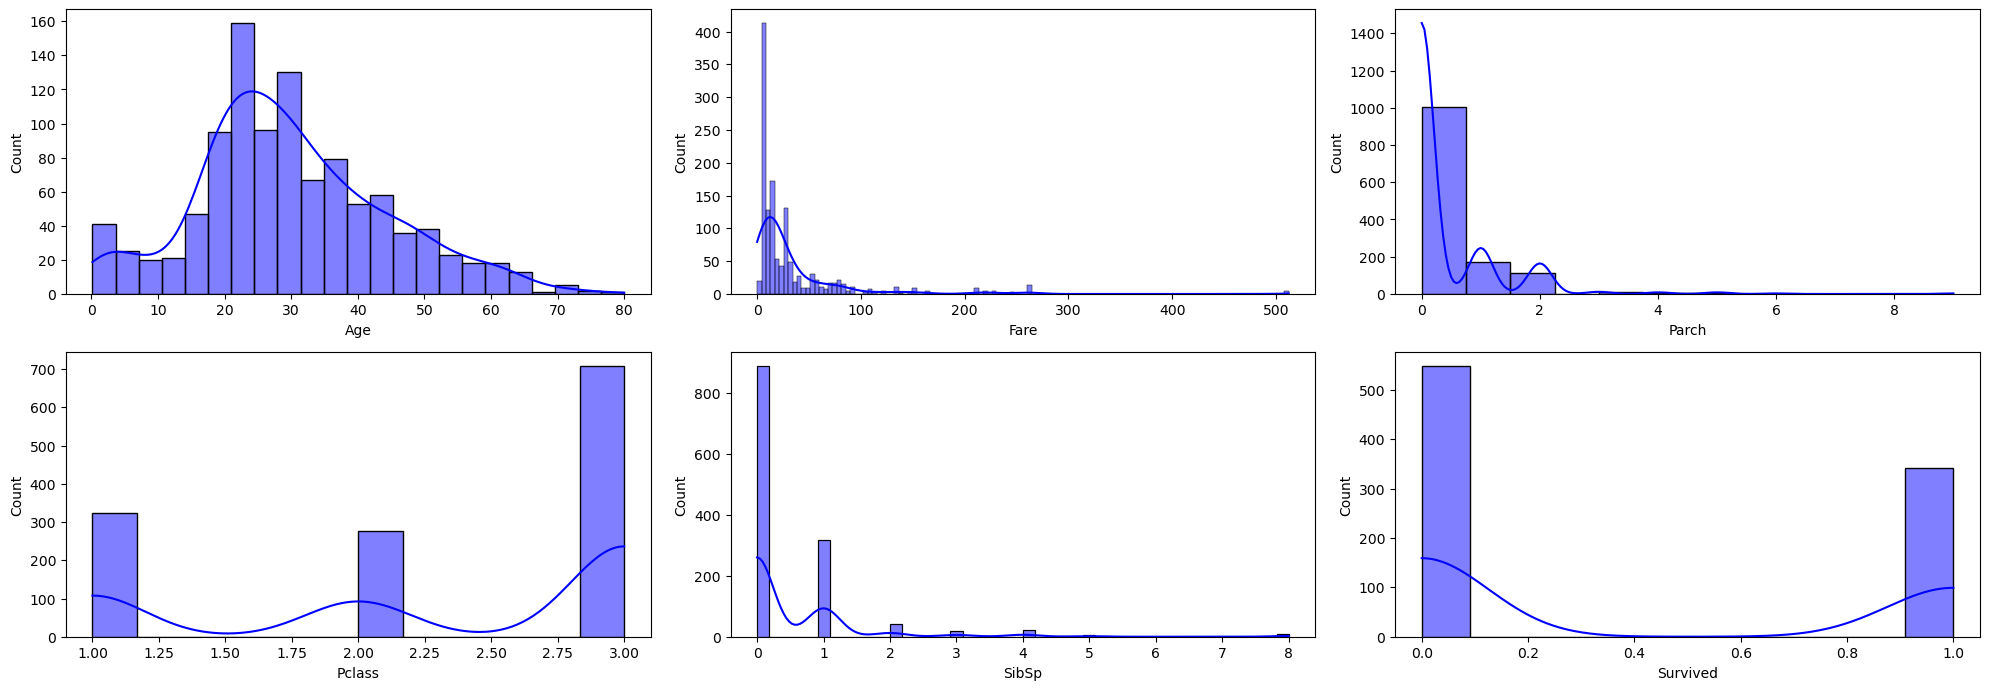

In [16]:
plt.figure(figsize=(20, 10))

for i in range(0, len(num)):
    plt.subplot(3, len(num) // 2, i+1)
    sns.histplot(x=df_merged[num[i]], kde=True, color='blue')
    plt.xlabel(num[i])
    plt.tight_layout()

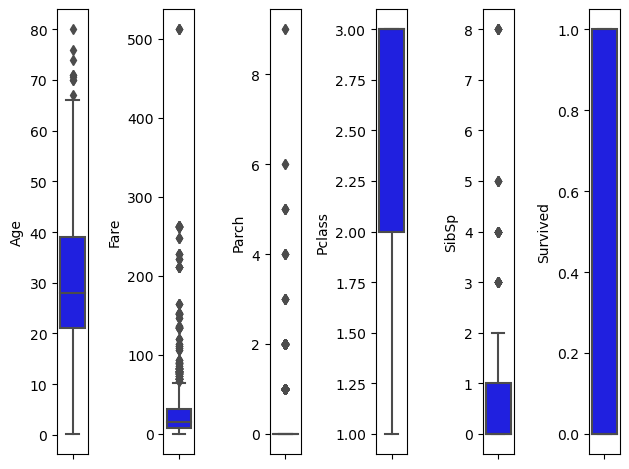

In [17]:
#Box plots
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y = df_merged[num[i]], color='blue')
    plt.tight_layout()

In [18]:
df_merged[num].corr()

,Age,Fare,Parch,Pclass,SibSp,Survived
Age,1.000000,0.177528,-0.150917,-0.408106,-0.243699,-0.077221
Fare,0.177528,1.000000,0.221635,-0.558683,0.160349,0.257307
Parch,-0.150917,0.221635,1.000000,0.018322,0.373587,0.081629
Pclass,-0.408106,-0.558683,0.018322,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160349,0.373587,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.338481,-0.035322,1.000000


<Axes: >

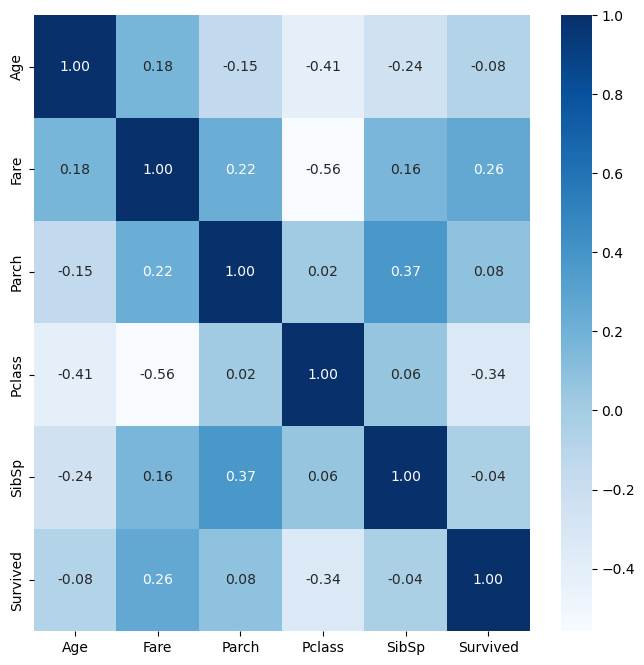

In [19]:
df_corr = df_merged.corr()
plt.figure(figsize = (8,8))
sns.heatmap(df_corr, cmap='Blues', annot = True, fmt = '.2f')

Em relação a correlação tem-se que:
- **Age**: A variável `Age` possui correlação negativa moderada com `Pclass` (-0,41), sugerindo que passageiros mais jovens tendem a estar em classes mais altas. A correlação com as demais variáveis é relativamente baixa, com uma fraca correlação com `Fare` (0,18) e uma correlação negativa com `SibSp` (-0,24).

- **Fare**: Apresenta uma correlação moderada negativa com `Pclass` (-0,56), indicando que passageiros das classes mais altas pagaram tarifas mais elevadas. Também há uma correlação positiva com `Parch` (0,22) e `Survived` (0,26), o que sugere que tarifas mais altas estão associadas a uma maior probabilidade de sobrevivência.

- **Parch**: Possui uma correlação positiva moderada com `SibSp` (0,37), o que é esperado, já que ambos se referem a membros da família. As correlações com as outras variáveis são relativamente fracas, incluindo uma pequena correlação positiva com `Survived` (0,08).

- **Pclass**: Tem uma correlação negativa moderada com `Survived` (-0,34), o que indica que passageiros de classes mais baixas tiveram menores chances de sobrevivência. A correlação negativa com `Age` (-0,41) sugere que passageiros mais velhos tendem a viajar em classes superiores.

- **SibSp**: Apresenta correlações fracas com as demais variáveis, incluindo uma correlação negativa muito pequena com `Survived` (-0,04), o que indica que o número de irmãos/cônjuges a bordo não tem um impacto significativo na sobrevivência.

- **Survived**: A variável de sobrevivência tem a correlação mais alta com `Fare` (0,26), indicando que, em média, passageiros que pagaram tarifas mais altas tiveram maior probabilidade de sobreviver. A correlação negativa com `Pclass` (-0,34) reforça a ideia de que passageiros de classes mais altas tinham maiores chances de sobrevivência.

In [20]:
#Categóricas
df_merged[cats].describe()

,Cabin,Embarked,Name,Sex,Ticket
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,916,2,843,11


- **Cabin**: A variável `Cabin` apresenta 295 valores não nulos, com 186 cabines distintas. A cabine mais frequente é `C23 C25 C27`, que aparece 6 vezes. O elevado número de valores únicos sugere que a maioria dos passageiros tinha uma cabine exclusiva.

- **Embarked**: Há três portos de embarque representados por `Embarked`, sendo eles Cherbourg (`C`), Queenstown (`Q`), e Southampton (`S`). O porto de Southampton (`S`) é o mais comum, representando 916 embarques, reforçando a escolha de preenchimento por moda nos valores ausentes.

- **Name**: Existem 1.309 nomes únicos, com exceção de dois registros duplicados (possivelmente erros ou casos especiais). Essa variável é composta quase inteiramente de valores únicos, o que a torna difícil de usar diretamente em modelos preditivos, embora possa ser decomposta para extrair informações úteis, como o título da pessoa.

- **Sex**: A variável `Sex` tem apenas dois valores distintos: `male` e `female`. O valor mais frequente é `male`, representando 843 passageiros, o que indica que a maioria dos passageiros era do sexo masculino.

- **Ticket**: A variável `Ticket` apresenta 929 valores únicos, com o bilhete mais comum sendo `CA. 2343`, registrado 11 vezes. A grande quantidade de valores distintos indica que os números de bilhete não seguem um padrão facilmente identificável.

In [21]:
df_merged[['Pclass', 'Survived']].groupby(['Pclass']).mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


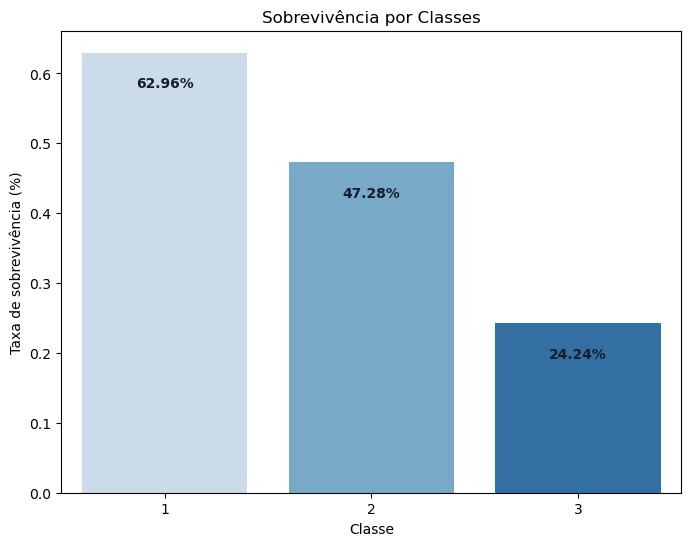

In [22]:
data = df_merged[['Pclass', 'Survived']].groupby(['Pclass']).mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Pclass', y='Survived', data=data, palette='Blues')

plt.title('Sobrevivência por Classes')
plt.xlabel('Classe')
plt.ylabel('Taxa de sobrevivência (%)')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height - 0.05, f'{height * 100:.2f}%', 
            ha="center", color="#181C2C", weight="bold")

plt.show()

- **Primeira Classe (Pclass = 1)**: A taxa de sobrevivência é de aproximadamente **62,96%**, o que sugere que passageiros da primeira classe tinham uma probabilidade significativamente maior de sobreviver.
  
- **Segunda Classe (Pclass = 2)**: A taxa de sobrevivência cai para **47,28%**, mostrando uma diferença notável em comparação à primeira classe.

- **Terceira Classe (Pclass = 3)**: A taxa de sobrevivência é de apenas **24,24%**, a mais baixa entre todas as classes, o que indica que passageiros da terceira classe tiveram uma probabilidade muito menor de sobreviver.

Passageiros da 1ª classe apresentaram maiores chances de sobrevivência, enquanto aqueles das classes inferiores, especialmente da 3ª classe, tiveram chances substancialmente menores. 

In [23]:
df_merged[['Sex', 'Survived']].groupby(['Sex']).mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


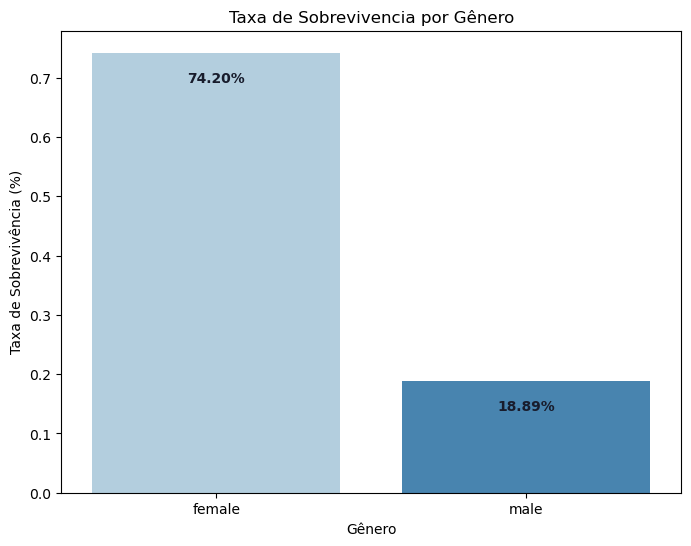

In [24]:
data = df_merged[['Sex', 'Survived']].groupby(['Sex']).mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sex', y='Survived', data = data, palette = 'Blues')

plt.title('Taxa de Sobrevivencia por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Sobrevivência (%)')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height - 0.05, f'{height * 100:.2f}%',
            ha='center', color='#181C2C', weight='bold')

plt.show()

- **Female**: A taxa de sobrevivência entre mulheres é de aproximadamente **74,2%**, indicando que a maioria das mulheres sobreviveu.
  
- **Male**: Em contraste, a taxa de sobrevivência entre homens é de apenas **18,9%**, sugerindo uma diferença significativa na probabilidade de sobrevivência entre os sexos.

In [25]:
df_merged[['SibSp', 'Survived']].groupby(['SibSp']).mean().reset_index()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


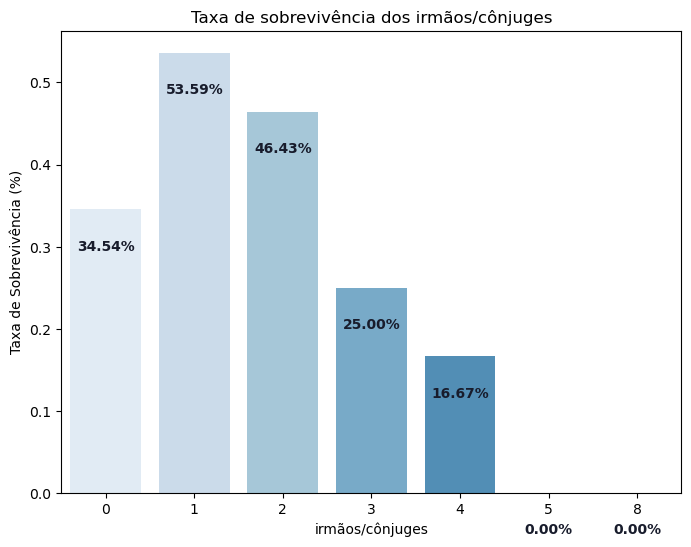

In [26]:
data = df_merged[['SibSp', 'Survived']].groupby(['SibSp']).mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='SibSp', y='Survived', data=data, palette='Blues')

plt.title('Taxa de sobrevivência dos irmãos/cônjuges')
plt.xlabel('irmãos/cônjuges')
plt.ylabel('Taxa de Sobrevivência (%)')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height - 0.05, f'{height * 100:.2f}%', 
            ha="center", color="#181C2C", weight="bold")

- **SibSp = 0**: Passageiros que não tinham irmãos ou cônjuges a bordo tiveram uma taxa de sobrevivência de **34,5%**.
- **SibSp = 1**: Aqueles com um irmão ou cônjuge a bordo apresentaram a maior taxa de sobrevivência, de **53,6%**.
- **SibSp = 2**: Para quem tinha dois irmãos/cônjuges, a taxa de sobrevivência caiu para **46,4%**.
- **SibSp ≥ 3**: A partir de três irmãos ou cônjuges, a taxa de sobrevivência diminui drasticamente:
    - **SibSp = 3**: **25,0%**
    - **SibSp = 4**: **16,7%**
    - **SibSp = 5 ou 8**: **0,0%** (nenhum passageiro com 5 ou 8 irmãos/cônjuges sobreviveu).


## feature Engineering

### Title

In [27]:
# Criar uma coluna com os títulos de cada passageiro

df_merged['Title'] = df_merged['Name'].str.extract('([a-zA-Z]+)\.')
df_merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

- **Mr**: título geralmente refere-se a homens adultos.
- **Miss**: O título `Miss`, utilizado para mulheres solteiras.
- **Mrs**: O título `Mrs`, utilizado para mulheres casadas.
- **Master**: O título `Master`, normalmente atribuído a meninos.
- **Other**: Os demais títulos serão caracterizados como `Other`.

In [28]:
df_merged['Title'] = df_merged['Title'].apply(lambda x: 'Other' if x not in ['Miss','Master','Mr','Mrs'] else x)
df_merged['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

### Valores ausentes da coluna Age

Para lidar com os valores ausentes na coluna `Age`, será adotada uma abordagem baseada na média de idades para cada título presente no conjunto de dados. Esta estratégia considera que os títulos (`Mr`, `Mrs`, `Miss`, `Master`) refletem diferentes faixas etárias, o que nos permitirá fazer imputações mais precisas.

In [29]:
title_ages = df_merged.groupby('Title')['Age'].mean()

In [30]:
df_merged['Age'] = df_merged.apply(lambda row: title_ages[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [31]:
df_merged.isnull().sum()

Age            0
Cabin       1014
Embarked       0
Fare           0
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
Title          0
dtype: int64

In [32]:
df_merged.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.907391,33.281086,0.385027,2.294882,0.498854,0.383838
std,13.197710,51.741500,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.774238,7.895800,0.000000,2.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,36.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


### Alone

Sera criado uma coluna `Alone`como indicativo se um passageiro estava viajando sozinho ou acompanhado. Para determinar isso, será utilizado as colunas `SibSp` (número de irmãos/cônjuges a bordo) e `Parch` (número de pais/filhos a bordo).

In [33]:
df_merged['Alone'] = (df_merged['SibSp'] + df_merged['Parch'] == 0).astype(int)

In [34]:
df_merged.groupby('Alone')['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

- **Passageiros Acompanhados (`Alone = 0`)**:
  - A taxa de sobrevivência para passageiros que estavam acompanhados foi de **50.57%**.
  
- **Passageiros Sozinhos (`Alone = 1`)**:
  - A taxa de sobrevivência para passageiros que estavam viajando sozinhos foi de **30.35%**.

### FamilySize

Para melhorar a análise sobre o impacto dos familiares na sobrevivência, será criado uma nova coluna chamada `FamilySize`, que representa o número total de membros da família que o passageiro tinha a bordo. Esta coluna é a soma das colunas `SibSp` (número de irmãos/cônjuges) e `Parch` (número de pais/filhos) + 1 para incluir o próprio passageiro no cálculo do tamanho da família.


In [35]:
df_merged['FamilySize'] = df_merged['SibSp'] + df_merged['Parch'] + 1
df_merged.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

### AgeGroup

Para facilitar a análise do impacto da idade na sobrevivência, será categorizado os passageiros em diferentes faixas etárias. A nova coluna será chamada `AgeGroup` e dividirá os passageiros em grupos de acordo com sua idade.

In [36]:
df_merged['AgeGroup'] = pd.cut(df_merged['Age'].astype('int'), bins = 5)
df_merged.groupby('AgeGroup')['Survived'].mean()

AgeGroup
(-0.08, 16.0]    0.548077
(16.0, 32.0]     0.328032
(32.0, 48.0]     0.436275
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

- **[-0.08 - 16]**: Passageiros nessa faixa etária tiveram uma taxa de sobrevivência de **54,81%**, indicando que mais da metade das crianças e adolescentes conseguiram sobreviver.
- **[16 - 32]**: Jovens adultos apresentaram uma taxa de sobrevivência de **32,80%**, mostrando que, apesar de ser um grupo numeroso, a sobrevivência foi inferior a 50%.
- **[32 - 48]**: Para aqueles entre 32 e 48 anos, a taxa de sobrevivência foi de **43,63%**, com um equilíbrio mais próximo entre sobreviventes e não sobreviventes.
- **[48 - 64]**: Passageiros nessa faixa etária tiveram uma taxa de sobrevivência de **43,48%**, semelhante ao grupo anterior, mas ainda abaixo da metade.
- **[64 - 80]**: Este grupo teve a menor taxa de sobrevivência, com apenas **9,09%** dos passageiros conseguindo sobreviver, evidenciando as dificuldades enfrentadas pelos mais velhos.


## Pré-processamento dos dados

### Binarização da coluna `Sex`

Como parte do pré-processamento dos dados para envio aos modelos de machine learning, a coluna `Sex` será binarizada.

In [37]:
df_merged['Sex'] = df_merged['Sex'].map({'male':0, 'female':1})

### Criação das Variáveis Dummy

In [38]:
df_merged = pd.get_dummies(df_merged, columns=['Embarked',
                                     'Sex',
                                     'Title',
                                     'AgeGroup'], drop_first=True)

### Remoção das colunas que não serão utilizadas 

In [39]:
df_merged.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

### df_train e df_test
No início do projeto, os conjuntos de dados `df_train` e `df_test` foram unidos em um único DataFrame chamado `df_merged` para facilitar o pré-processamento e a análise. A seguir, será separado de volta

In [40]:
df_train = df_merged.iloc[:train_idx]
df_test = df_merged.iloc[train_idx:]

In [41]:
df_test

,Age,Fare,Parch,Pclass,SibSp,Survived,Alone,FamilySize,Embarked_Q,Embarked_S,Sex_1,Title_Miss,Title_Mr,Title_Mrs,Title_Other,"AgeGroup_(16.0, 32.0]","AgeGroup_(32.0, 48.0]","AgeGroup_(48.0, 64.0]","AgeGroup_(64.0, 80.0]"
PassengerId,,,,,,,,,,,,,,,,,,,
892,34.500000,7.8292,0,3,0,NaN,1,1,1,0,0,0,1,0,0,0,1,0,0
893,47.000000,7.0000,0,3,1,NaN,0,2,0,1,1,0,0,1,0,0,1,0,0
894,62.000000,9.6875,0,2,0,NaN,1,1,1,0,0,0,1,0,0,0,0,1,0
895,27.000000,8.6625,0,3,0,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0
896,22.000000,12.2875,1,3,1,NaN,0,3,0,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,32.252151,8.0500,0,3,0,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0
1306,39.000000,108.9000,0,1,0,NaN,1,1,0,0,1,0,0,0,1,0,1,0,0
1307,38.500000,7.2500,0,3,0,NaN,1,1,0,1,0,0,1,0,0,0,1,0,0


In [42]:
# salvar PassengerId para submissao
passengerId = df_test.index

In [43]:
df_train.shape, df_test.shape

((891, 19), (418, 19))

Separação das variáveis preditoras da variável alvo

In [44]:
X = df_train.drop('Survived', axis = 1)
y = df_train['Survived']

### Divisão de treino e Teste

A divisão entre conjuntos de treino e teste para a construção dos modelos. Esta separação permite avaliar o desempenho do modelo em dados que não foram utilizados durante o treinamento, garantindo que ele generalize bem para novas observações.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((623, 18), (623,))

In [46]:
X_test.shape, y_test.shape

((268, 18), (268,))

### Padronizar os dados

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo 01 - Regressão Logística (Benchmark)

A Regressão Logística é um dos modelos mais simples e amplamente utilizados para problemas de classificação binária. Neste contexto, ela será utilizada como modelo de benchmark para avaliar o desempenho em prever a sobrevivência dos passageiros no Titanic. A ideia é estabelecer uma linha de base que outros modelos mais complexos poderão superar.

In [48]:
model_v1 = LogisticRegression()

#fit do modelo
model_v1.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
#Previsões
y_pred_1 = model_v1.predict(X_test_scaled)

In [50]:
#Avaliação do modelo
accuracy_v1 = accuracy_score(y_test, y_pred_1)
print(accuracy_v1)

0.8171641791044776


In [51]:
conf_matrix_v1 = confusion_matrix(y_test, y_pred_1)
class_report_v1 = classification_report(y_test, y_pred_1)

In [52]:
print("Acurácia:", accuracy_v1)
print("Matriz de Confusão:\n", conf_matrix_v1)
print("Relatório de Classificação:\n", class_report_v1)

Acurácia: 0.8171641791044776
Matriz de Confusão:
 [[134  23]
 [ 26  85]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       157
         1.0       0.79      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



#### Acurácia
- **Acurácia**: 0.8172 (ou 81.72%)
  - A acurácia indica que aproximadamente 81.72% das previsões do modelo estavam corretas.

#### Matriz de Confusão
A matriz de confusão fornece uma visão detalhada das previsões do modelo em relação aos valores reais:

- **Interpretando a Matriz**:
  - **135**: Verdadeiros Negativos (VN) - Passageiros não sobreviventes corretamente classificados.
  - **22**: Falsos Positivos (FP) - Passageiros não sobreviventes incorretamente classificados como sobreviventes.
  - **27**: Falsos Negativos (FN) - Passageiros sobreviventes incorretamente classificados como não sobreviventes.
  - **84**: Verdadeiros Positivos (VP) - Passageiros sobreviventes corretamente classificados.

#### Relatório de Classificação
O relatório de classificação detalha a precisão, recall e F1-score para cada classe:
 
 **Precision**: Medida da precisão das previsões do modelo.
  - Para a classe 0 (não sobreviventes): 0.83
  - Para a classe 1 (sobreviventes): 0.79

- **Recall**: Medida da capacidade do modelo em identificar corretamente as instâncias positivas.
  - Para a classe 0: 0.86
  - Para a classe 1: 0.76

- **F1-Score**: Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre as duas métricas.
  - Para a classe 0: 0.85
  - Para a classe 1: 0.77

- **Média Macro**: Média das métricas para cada classe, tratando todas igualmente.
  - F1-score: 0.81

- **Média Ponderada**: Média das métricas levando em consideração o suporte (número de instâncias) de cada classe.
  - F1-score: 0.82

### Conclusão
Os resultados do modelo de Regressão Logística indicam um desempenho satisfatório, com uma acurácia de aproximadamente 81.72%. As métricas de precisão e recall sugerem que o modelo está se saindo bem na identificação de passageiros sobreviventes e não sobreviventes. Esses resultados servirão como base para comparação com modelos mais complexos.

In [53]:
#Salvar os resultados
df_models = pd.DataFrame()

dict_models_v1 = {'Nome': 'model_v1',
                  'Algoritmo': 'Regressão Logística',
                  'Acurácia': accuracy_v1}

df_models = df_models.append(dict_models_v1, ignore_index = True)

In [54]:
df_models

,Nome,Algoritmo,Acurácia
0,model_v1,Regressão Logística,0.817164


### Modelo 02 - Árvore de Decisão
A Árvore de Decisão é um modelo de aprendizado supervisionado que utiliza uma estrutura hierárquica para fazer previsões baseadas em regras de decisão. Este modelo é fácil de interpretar, pois cria uma sequência de decisões condicionais que levam a uma conclusão final. No contexto deste projeto, a Árvore de Decisão será utilizada para prever a sobrevivência dos passageiros no Titanic.

In [55]:
model_v2 = DecisionTreeClassifier(random_state=42)

model_v2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
#Previsões
y_pred_2 = model_v2.predict(X_test_scaled)

In [57]:
#Acurácia
accuracy_v2 = accuracy_score(y_test, y_pred_2)
print(f'Acurácia: {accuracy_v2}')

#Matriz de confusão
conf_matrix_v2 = confusion_matrix(y_test, y_pred_2)
print('Matriz de Confusão:')
print(conf_matrix_v2)

#Relatório de Classificação
class_report_v2 = classification_report(y_test, y_pred_2)
print('Relatório de Classificação:')
print(class_report_v2)

Acurácia: 0.7723880597014925
Matriz de Confusão:
[[132  25]
 [ 36  75]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       157
         1.0       0.75      0.68      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



## Resultados do Modelo de Árvore de Decisão

#### Acurácia
- **Acurácia**: 0.7724 (ou 77.24%)
  - A acurácia indica que aproximadamente 77.24% das previsões do modelo estavam corretas.

#### Matriz de Confusão
A matriz de confusão fornece uma visão detalhada das previsões do modelo em relação aos valores reais:

- **Interpretando a Matriz**:
  - **132**: Verdadeiros Negativos (VN) - Passageiros não sobreviventes corretamente classificados.
  - **25**: Falsos Positivos (FP) - Passageiros não sobreviventes incorretamente classificados como sobreviventes.
  - **36**: Falsos Negativos (FN) - Passageiros sobreviventes incorretamente classificados como não sobreviventes.
  - **75**: Verdadeiros Positivos (VP) - Passageiros sobreviventes corretamente classificados.

#### Relatório de Classificação
O relatório de classificação detalha a precisão, recall e F1-score para cada classe:

- **Precision**: Medida da precisão das previsões do modelo.
  - Para a classe 0 (não sobreviventes): 0.79
  - Para a classe 1 (sobreviventes): 0.75

- **Recall**: Medida da capacidade do modelo em identificar corretamente as instâncias positivas.
  - Para a classe 0: 0.84
  - Para a classe 1: 0.68

- **F1-Score**: Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre as duas métricas.
  - Para a classe 0: 0.81
  - Para a classe 1: 0.71

- **Média Macro**: Média das métricas para cada classe, tratando todas igualmente.
  - F1-score: 0.76

- **Média Ponderada**: Média das métricas levando em consideração o suporte (número de instâncias) de cada classe.
  - F1-score: 0.77

### Conclusão
Os resultados do modelo de Árvore de Decisão indicam uma acurácia de aproximadamente 77.24%. O modelo apresenta bom desempenho na classificação dos passageiros, com uma precisão de 0.79 para a classe de não sobreviventes e 0.75 para sobreviventes.

A diferença de desempenho sugere que a Regressão Logística tem uma ligeira vantagem em termos de acurácia.

In [58]:
#Salvar os resultados
dict_models_v2 = {'Nome': 'model_v2',
                  'Algoritmo': 'Árvore de Decisão',
                  'Acurácia': accuracy_v2}

df_models = df_models.append(dict_models_v2, ignore_index = True)

In [59]:
df_models

,Nome,Algoritmo,Acurácia
0,model_v1,Regressão Logística,0.817164
1,model_v2,Árvore de Decisão,0.772388


## Modelo 03 - Random Forest

O Random Forest é um modelo de aprendizado de máquina baseado em múltiplas árvores de decisão. Ele combina o resultado de várias árvores individuais para obter uma predição final mais robusta.


In [60]:
model_v2 = DecisionTreeClassifier(random_state=42)

model_v2.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
model_v3 = RandomForestClassifier(random_state=42)
model_v3.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [62]:
#previsão
y_pred_3 = model_v3.predict(X_test_scaled)

In [63]:
# Acurácia
accuracy_v3 = accuracy_score(y_test, y_pred_3)
print(f'Acurácia: {accuracy_v3}')

# Matriz de Confusão
conf_matrix_v3 = confusion_matrix(y_test, y_pred_3)
print('Matriz de Confusão:')
print(conf_matrix_v3)

# Relatório de Classificação
class_report_v3 = classification_report(y_test, y_pred_3)
print('Relatório de Classificação:')
print(class_report_v3)

Acurácia: 0.8097014925373134
Matriz de Confusão:
[[137  20]
 [ 31  80]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       157
         1.0       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



#### Acurácia
- **Acurácia**: 0.8097 (ou 80.97%)
  - A acurácia indica que aproximadamente 80.97% das previsões do modelo estavam corretas.

#### Matriz de Confusão
A matriz de confusão fornece uma visão detalhada das previsões do modelo em relação aos valores reais:

- **Interpretando a Matriz**:
  - **137**: Verdadeiros Negativos (VN) - Passageiros não sobreviventes corretamente classificados.
  - **20**: Falsos Positivos (FP) - Passageiros não sobreviventes incorretamente classificados como sobreviventes.
  - **31**: Falsos Negativos (FN) - Passageiros sobreviventes incorretamente classificados como não sobreviventes.
  - **80**: Verdadeiros Positivos (VP) - Passageiros sobreviventes corretamente classificados.

#### Relatório de Classificação
O relatório de classificação detalha a precisão, recall e F1-score para cada classe:

- **Precision**: Medida da precisão das previsões do modelo.
  - Para a classe 0 (não sobreviventes): 0.82
  - Para a classe 1 (sobreviventes): 0.80

- **Recall**: Medida da capacidade do modelo em identificar corretamente as instâncias positivas.
  - Para a classe 0: 0.87
  - Para a classe 1: 0.72

- **F1-Score**: Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre as duas métricas.
  - Para a classe 0: 0.84
  - Para a classe 1: 0.76

- **Média Macro**: Média das métricas para cada classe, tratando todas igualmente.
  - F1-score: 0.80

- **Média Ponderada**: Média das métricas levando em consideração o suporte (número de instâncias) de cada classe.
  - F1-score: 0.81

### Conclusão
Os resultados do modelo Random Forest indicam uma acurácia de 80.97%, ligeiramente superior à do modelo de Árvore de Decisão.

In [64]:
#Salvar os resultados
dict_models_v3 = {'Nome': 'model_v3',
                  'Algoritmo': 'Random Forest',
                  'Acurácia': accuracy_v3}

df_models = df_models.append(dict_models_v3, ignore_index = True)

In [65]:
df_models

,Nome,Algoritmo,Acurácia
0,model_v1,Regressão Logística,0.817164
1,model_v2,Árvore de Decisão,0.772388
2,model_v3,Random Forest,0.809701


## MLPClassifier

In [66]:
model_v4 = MLPClassifier(random_state=42, max_iter=1000)

model_v4.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [67]:
#predição
y_pred_4 = model_v4.predict(X_test_scaled)

In [68]:
# Acurácia
accuracy_v4 = accuracy_score(y_test, y_pred_4)
print(f'Acurácia: {accuracy_v4}')

# Matriz de confusão
conf_matrix_v4 = confusion_matrix(y_test, y_pred_4)
print('Matriz de Confusão:')
print(conf_matrix_v4)

# Relatório de Classificação
class_report_v4 = classification_report(y_test, y_pred_4)
print('Relatório de Classificação:')
print(class_report_v4)

Acurácia: 0.8134328358208955
Matriz de Confusão:
[[143  14]
 [ 36  75]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       157
         1.0       0.84      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



#### Acurácia
- **Acurácia**: 0.8134 (ou 81.34%)
  - A acurácia indica que aproximadamente 81.34% das previsões do modelo estavam corretas.

#### Matriz de Confusão
A matriz de confusão fornece uma visão detalhada das previsões do modelo em relação aos valores reais:

- **Interpretando a Matriz**:
  - **143**: Verdadeiros Negativos (VN) - Passageiros não sobreviventes corretamente classificados.
  - **14**: Falsos Positivos (FP) - Passageiros não sobreviventes incorretamente classificados como sobreviventes.
  - **36**: Falsos Negativos (FN) - Passageiros sobreviventes incorretamente classificados como não sobreviventes.
  - **75**: Verdadeiros Positivos (VP) - Passageiros sobreviventes corretamente classificados.

#### Relatório de Classificação
O relatório de classificação detalha a precisão, recall e F1-score para cada classe:

- **Precision**: Medida da precisão das previsões do modelo.
  - Para a classe 0 (não sobreviventes): 0.80
  - Para a classe 1 (sobreviventes): 0.84

- **Recall**: Medida da capacidade do modelo em identificar corretamente as instâncias positivas.
  - Para a classe 0: 0.91
  - Para a classe 1: 0.68

- **F1-Score**: Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre as duas métricas.
  - Para a classe 0: 0.85
  - Para a classe 1: 0.75

- **Média Macro**: Média das métricas para cada classe, tratando todas igualmente.
  - F1-score: 0.80

- **Média Ponderada**: Média das métricas levando em consideração o suporte (número de instâncias) de cada classe.
  - F1-score: 0.81

### Conclusão
Os resultados do modelo de Redes Neurais indicam um desempenho robusto, com uma acurácia de aproximadamente 81.34%. Comparado ao modelo de Regressão Logística, que apresentou uma acurácia de 81.72%, e ao modelo de Árvore de Decisão, com 77.24%, o MLPClassifier superou o modelo de árvore, mas ficou ligeiramente abaixo da regressão logística.

In [69]:
#Salvar os resultados
dict_models_v4 = {'Nome': 'model_v4',
                  'Algoritmo': 'MLPClassifier',
                  'Acurácia': accuracy_v4}

df_models = df_models.append(dict_models_v4, ignore_index = True)

## Ajuste de Hiperparâmetros da Regressão Logística

In [70]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'penalty': ['l1', 'l2']}

model_v5 = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1)

In [71]:
model_v5.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [72]:
best_model_v5 = model_v5.best_estimator_

In [73]:
y_pred_v5 = best_model_v5.predict(X_test_scaled)

In [74]:
accuracy_v5 = accuracy_score(y_test, y_pred_v5)
print(f'Acurácia: {accuracy_v5}')

conf_matrix_v5 = confusion_matrix(y_test, y_pred_v5)
print('Matriz de Confusão:')
print(conf_matrix_v5)

class_report_v5 = classification_report(y_test, y_pred_v5)
print('Relatório de Classificação:')
print(class_report_v5)

Acurácia: 0.8171641791044776
Matriz de Confusão:
[[134  23]
 [ 26  85]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       157
         1.0       0.79      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



#### Acurácia
- **Acurácia**: 0.8172 (ou 81.72%)
  - A acurácia indica que aproximadamente 81.72% das previsões do modelo estavam corretas.

#### Matriz de Confusão
A matriz de confusão fornece uma visão detalhada das previsões do modelo em relação aos valores reais:

- **Interpretando a Matriz**:
  - **134**: Verdadeiros Negativos (VN) - Passageiros não sobreviventes corretamente classificados.
  - **23**: Falsos Positivos (FP) - Passageiros não sobreviventes incorretamente classificados como sobreviventes.
  - **26**: Falsos Negativos (FN) - Passageiros sobreviventes incorretamente classificados como não sobreviventes.
  - **85**: Verdadeiros Positivos (VP) - Passageiros sobreviventes corretamente classificados.

#### Relatório de Classificação
O relatório de classificação detalha a precisão, recall e F1-score para cada classe:

- **Precision**: Medida da precisão das previsões do modelo.
  - Para a classe 0 (não sobreviventes): 0.84
  - Para a classe 1 (sobreviventes): 0.79

- **Recall**: Medida da capacidade do modelo em identificar corretamente as instâncias positivas.
  - Para a classe 0: 0.85
  - Para a classe 1: 0.77

- **F1-Score**: Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre as duas métricas.
  - Para a classe 0: 0.85
  - Para a classe 1: 0.78

- **Média Macro**: Média das métricas para cada classe, tratando todas igualmente.
  - F1-score: 0.81

- **Média Ponderada**: Média das métricas levando em consideração o suporte (número de instâncias) de cada classe.
  - F1-score: 0.82

In [75]:
#Salvar os resultados
dict_models_v5 = {'Nome': 'model_v5',
                  'Algoritmo': 'Regressão Logística com Parâmetros Ajustados',
                  'Acurácia': accuracy_v5}

df_models = df_models.append(dict_models_v5, ignore_index = True)

## Submissão

In [76]:
df_models

,Nome,Algoritmo,Acurácia
0,model_v1,Regressão Logística,0.817164
1,model_v2,Árvore de Decisão,0.772388
2,model_v3,Random Forest,0.809701
3,model_v4,MLPClassifier,0.813433
4,model_v5,Regressão Logística com Parâmetros Ajustados,0.817164


In [77]:
df_models = df_models.sort_values(by='Acurácia', ascending=False)

In [78]:
df_models

,Nome,Algoritmo,Acurácia
0,model_v1,Regressão Logística,0.817164
4,model_v5,Regressão Logística com Parâmetros Ajustados,0.817164
3,model_v4,MLPClassifier,0.813433
2,model_v3,Random Forest,0.809701
1,model_v2,Árvore de Decisão,0.772388


In [79]:
df_test

,Age,Fare,Parch,Pclass,SibSp,Survived,Alone,FamilySize,Embarked_Q,Embarked_S,Sex_1,Title_Miss,Title_Mr,Title_Mrs,Title_Other,"AgeGroup_(16.0, 32.0]","AgeGroup_(32.0, 48.0]","AgeGroup_(48.0, 64.0]","AgeGroup_(64.0, 80.0]"
PassengerId,,,,,,,,,,,,,,,,,,,
892,34.500000,7.8292,0,3,0,NaN,1,1,1,0,0,0,1,0,0,0,1,0,0
893,47.000000,7.0000,0,3,1,NaN,0,2,0,1,1,0,0,1,0,0,1,0,0
894,62.000000,9.6875,0,2,0,NaN,1,1,1,0,0,0,1,0,0,0,0,1,0
895,27.000000,8.6625,0,3,0,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0
896,22.000000,12.2875,1,3,1,NaN,0,3,0,1,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,32.252151,8.0500,0,3,0,NaN,1,1,0,1,0,0,1,0,0,1,0,0,0
1306,39.000000,108.9000,0,1,0,NaN,1,1,0,0,1,0,0,0,1,0,1,0,0
1307,38.500000,7.2500,0,3,0,NaN,1,1,0,1,0,0,1,0,0,0,1,0,0


In [80]:
df_test.drop('Survived', axis=1, inplace=True)

In [81]:
df_test.shape, X_test.shape

((418, 18), (268, 18))

In [91]:
subm = model_v1.predict(df_test)

In [92]:
subm.shape

(418,)

In [93]:
subm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [94]:
df_test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [95]:
submission = pd.DataFrame({
    'PassengerId': df_test.index,
    'Survived': subm })

In [96]:
submission.shape

(418, 2)

In [97]:
submission['Survived'] = submission['Survived'].astype('int')

In [98]:
submission.to_csv('subm.csv', index=False)

In [90]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
